The DMC algorithm is accurate only in the limit of small time step τ. However, the computational effort required to achieve a given error bar goes as 1/τ , ruling out the use of infinitesimal time steps in practice. Hence, where high accuracy is required, several finite time steps are generally used and the DMC energy is obtained
by extrapolating to τ = 0
For all-electron atomic systems, the linear regime to occurs for time steps less than of the order τ = 1/(3Z<sup>2</sup>), where Z is the largest atomic number occurring in the system. This choice of time step ensures that the rms distance diffused is equal to one Bohr radius of the largest atom under study.
In CASINO workflow timestep can be set relative to 1/(3Z<sup>2</sup>). For H-Ar atoms, the DMC energy was calculated using timestep values: 1/(3Z<sup>2</sup>), 1/(6Z<sup>2</sup>), 1/(12Z<sup>2</sup>) and corresponding 1024, 2048, 4096 walkers populations.

In [5]:
import re
import os
import numpy as np
from math import sqrt
from functools import partial
import matplotlib.pyplot as plt

def dmc_energy(*path):
    """Get DMC energy.
          mean:   -153.795024411601 +/-       0.001346260888
    """

    dir = os.path.join(*path)
    try:
        open(os.path.join(dir, '.casino_finished'), 'r').close()
        regexp = re.compile('mean:\s+(?P<energy>[-+]?\d+\.\d+) \+/- \s+(?P<energy_error>[-+]?\d+\.\d+)')
        with open(os.path.join(dir, 'out'), 'r') as dmc_out:
            # we are only interested in the last occurrence
            return list(map(float, re.findall(regexp, dmc_out.read())[-1]))
    except (FileNotFoundError, IndexError) as e:
        return None, None
    
def casino_time(*path):
    """Get CASINO time.
     Total CASINO CPU time  : : :      378.0500
    """
    regexp = re.compile(' Total CASINO CPU time  : : :\s+(?P<energy_error>\d+\.\d+)')
    try:
        with open(os.path.join(*path, 'out'), 'r') as casino_out:
            # we are only interested in the last occurrence
            return list(float(re.findall(regexp, casino_out.read())[-1]))
    except (FileNotFoundError, IndexError) as e:
        return None    

In [10]:
energy = {}
energy_0 = {}  # DMC energy at zero timestep
x = timesteps = (0.25, 0.5, 1.0)
y = {}
yerr = {}
fit = {}
for atom in ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na']:
    energy[atom] = {}
    for timestep in timesteps:
        energy[atom][timestep] = dmc_energy(atom, 'VMC_DMC', 'emin', '8_8_44_simple', 'tmax_{}_{}_2'.format(int(1/timestep), int(1024/timestep)))
    y[atom] = [energy[atom][timestep][0] for timestep in timesteps]
    yerr[atom] = [energy[atom][timestep][1] for timestep in timesteps]
    fit[atom] = np.polyfit(x, y[atom], 1)
    energy_0[atom] = (fit[atom][1], np.sqrt(sum(err**2 for err in yerr[atom]))/len(yerr[atom]))
    
%matplotlib notebook
        
def time_step_plot(atom):
    xmin, xmax = 0.0, 1.2
    fit_fn = np.poly1d(fit[atom])
    fig, axes = plt.subplots(num='{} DMC energy vs relative time step'.format(atom))
    axes.set_xlim(xmin=xmin, xmax=xmax)
    axes.plot([xmin, xmax], fit_fn([xmin, xmax]), '--k')
    axes.errorbar(x, y[atom], yerr[atom], marker='o', ms=7, capsize=5, ls='none')
    axes.set_xlabel('DMC relative time step')
    axes.set_ylabel('DMC energy')
    axes.minorticks_on()
    axes.ticklabel_format(useOffset=False)
    axes.grid(which='major', linestyle='-', linewidth=0.5, color='black')
    axes.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
    axes.tick_params(which='both', top=False, left=False, right=False, bottom=False)
    fig.show()

<IPython.core.display.Javascript object>


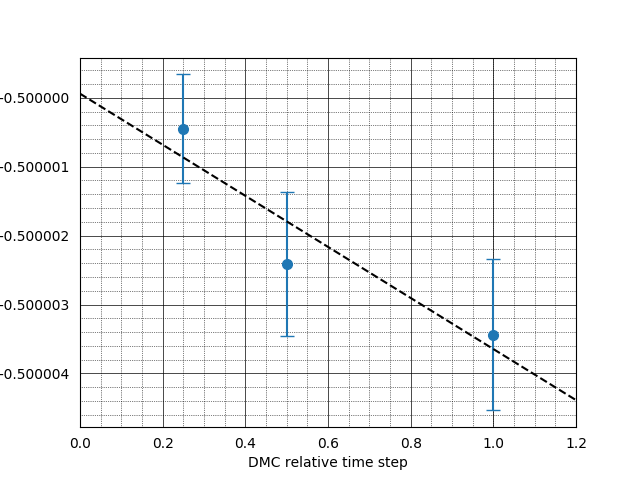

In [11]:
time_step_plot('H')

<IPython.core.display.Javascript object>


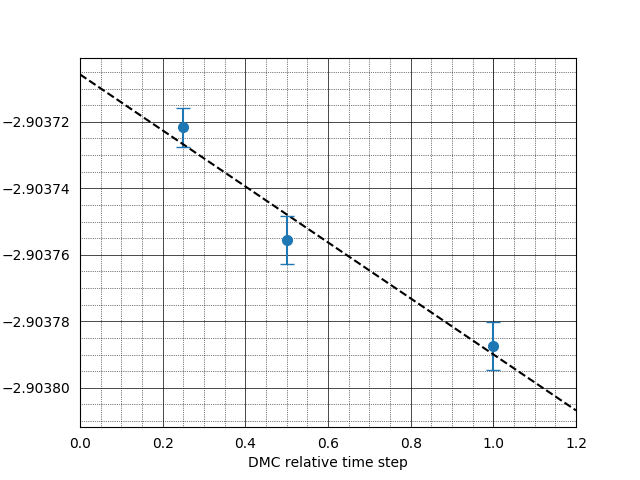

In [71]:
time_step_plot('He')

<IPython.core.display.Javascript object>


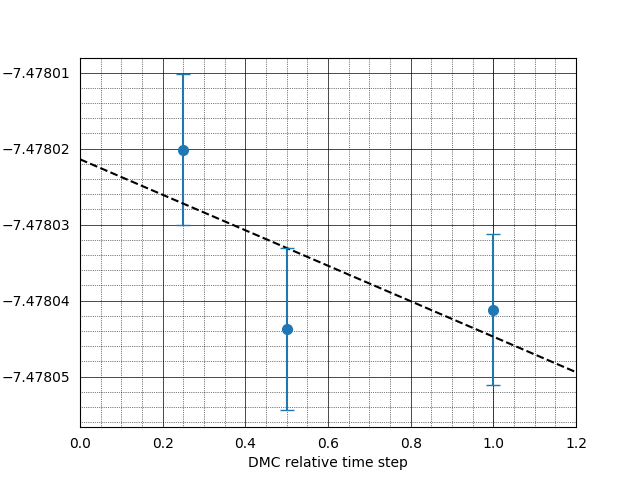

In [72]:
time_step_plot('Li')

<IPython.core.display.Javascript object>


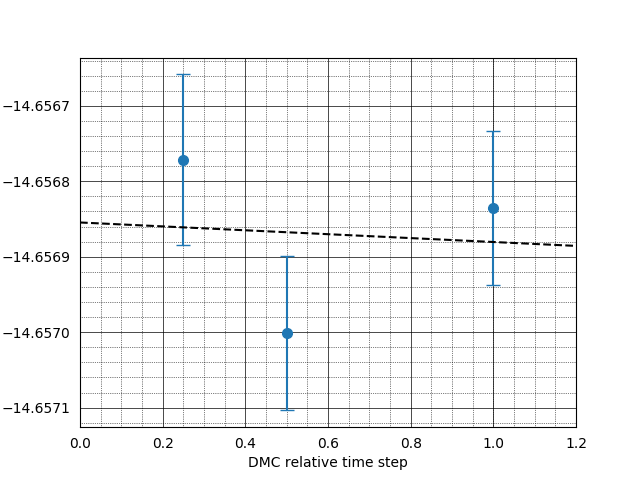

In [73]:
time_step_plot('Be')

<IPython.core.display.Javascript object>


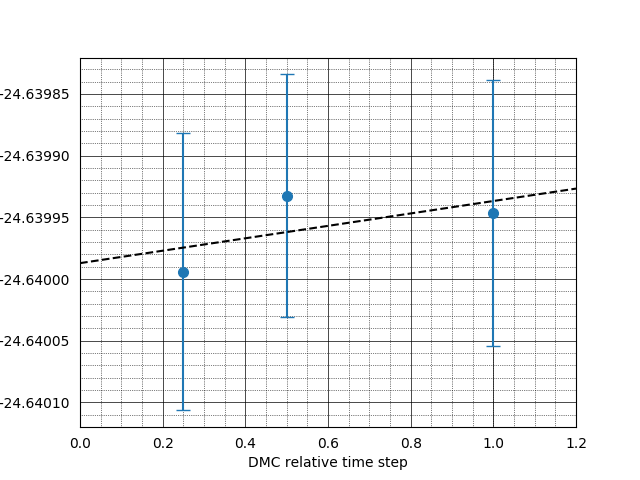

In [74]:
time_step_plot('B')

<IPython.core.display.Javascript object>


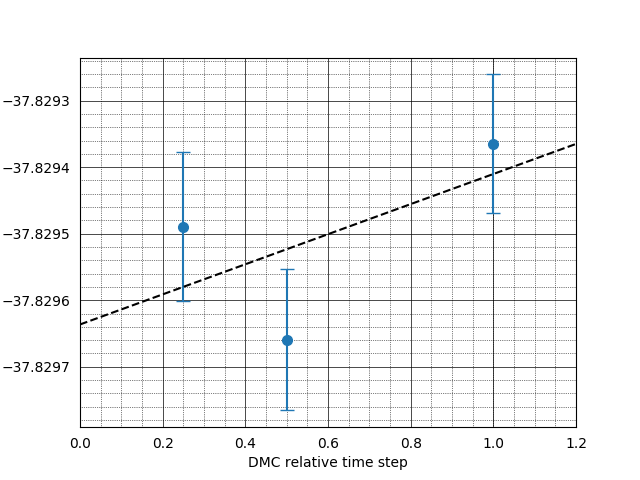

In [75]:
time_step_plot('C')

<IPython.core.display.Javascript object>


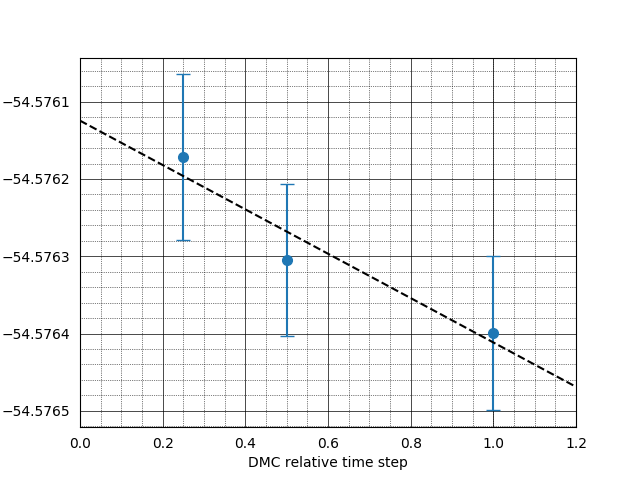

In [76]:
time_step_plot('N')

<IPython.core.display.Javascript object>


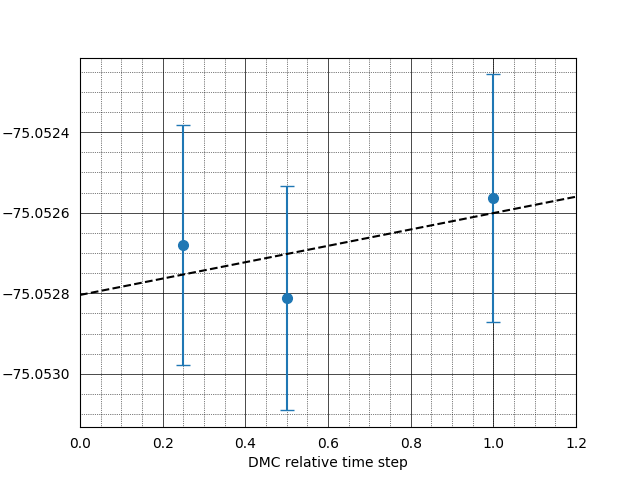

In [77]:
time_step_plot('O')

<IPython.core.display.Javascript object>


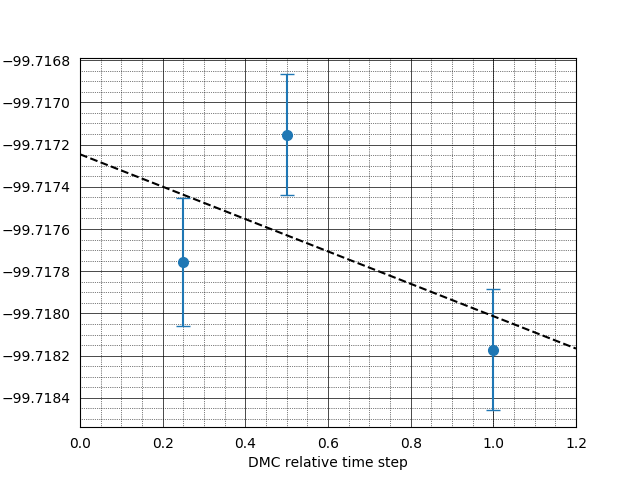

In [78]:
time_step_plot('F')

<IPython.core.display.Javascript object>


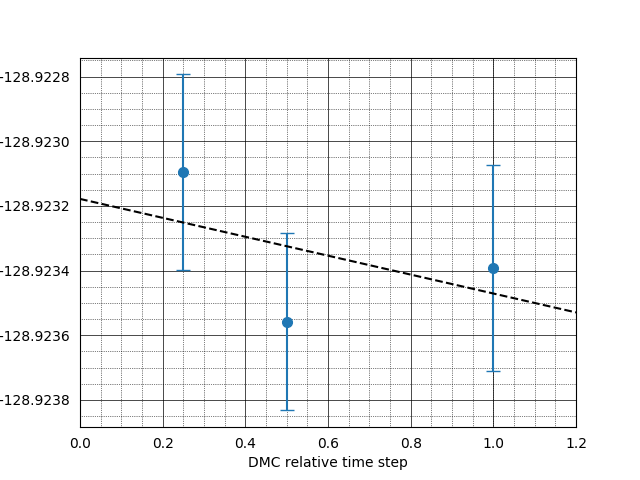

In [79]:
time_step_plot('Ne')

In [80]:
print(energy_0)

{'H': (-0.49999994068699988, 5.7046740830908901e-07), 'He': (-2.9037057553984988, 3.9038273944633845e-06), 'Li': (-7.4780213973549969, 5.8786367536453457e-06), 'Be': (-14.656854581299497, 6.119246514074159e-05), 'B': (-24.639987123482005, 6.1375202458075181e-05), 'C': (-37.829636457447997, 6.227951334276675e-05), 'N': (-54.576124521370517, 5.8855432473309034e-05), 'O': (-75.052804164737978, 0.00017020256284513874), 'F': (-99.717245952400461, 0.00016879003372976935), 'Ne': (-128.92317831325744, 0.00017264935805349994)}
